## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [3]:
df = pd.read_excel("ASIALNG.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,ASIALNG,ASIALNG_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,0.004310,-0.021368,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,-0.163152,0.004310,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.070803,-0.163152,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,-0.030347,-0.070803,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.019418,-0.030347,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.020990,-0.193205,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,0.073401,0.020990,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.076927,0.073401,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


In [4]:
y = df['ASIALNG']
X = df[["ASIALNG_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                ASIALNG   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.511
Date:                Sat, 13 Jan 2024   Prob (F-statistic):            0.00904
Time:                        14:23:14   Log-Likelihood:                 138.11
No. Observations:                 265   AIC:                            -256.2
Df Residuals:                     255   BIC:                            -220.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [5]:
selected_columns = ["ASIALNG","ASIALNG_LAG","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,ASIALNG,ASIALNG_LAG,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,
2001-10-01,0.004310,-0.021368,0.39,0,0
2001-11-01,-0.163152,0.004310,-0.06,0,0
2001-12-01,-0.070803,-0.163152,0.09,0,0
2002-01-01,-0.030347,-0.070803,-0.39,0,0
2002-02-01,0.019418,-0.030347,0.29,0,0
...,...,...,...,...,...
2023-06-01,0.020990,-0.193205,2.32,1,1
2023-07-01,0.073401,0.020990,-2.45,1,1
2023-08-01,0.076927,0.073401,-0.81,1,1


In [6]:
# Separating the dependent variable
y = pruned_df.iloc[:, 0].values.reshape(-1, 1)
X = pruned_df.iloc[:, 1:].values

# Scaling only the dependent variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])

# Manually splitting data into train and test sets without shuffling
split_index = int(0.91 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [7]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=4, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=12, verbose=0)

In [8]:
# Making predictions
predictions = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


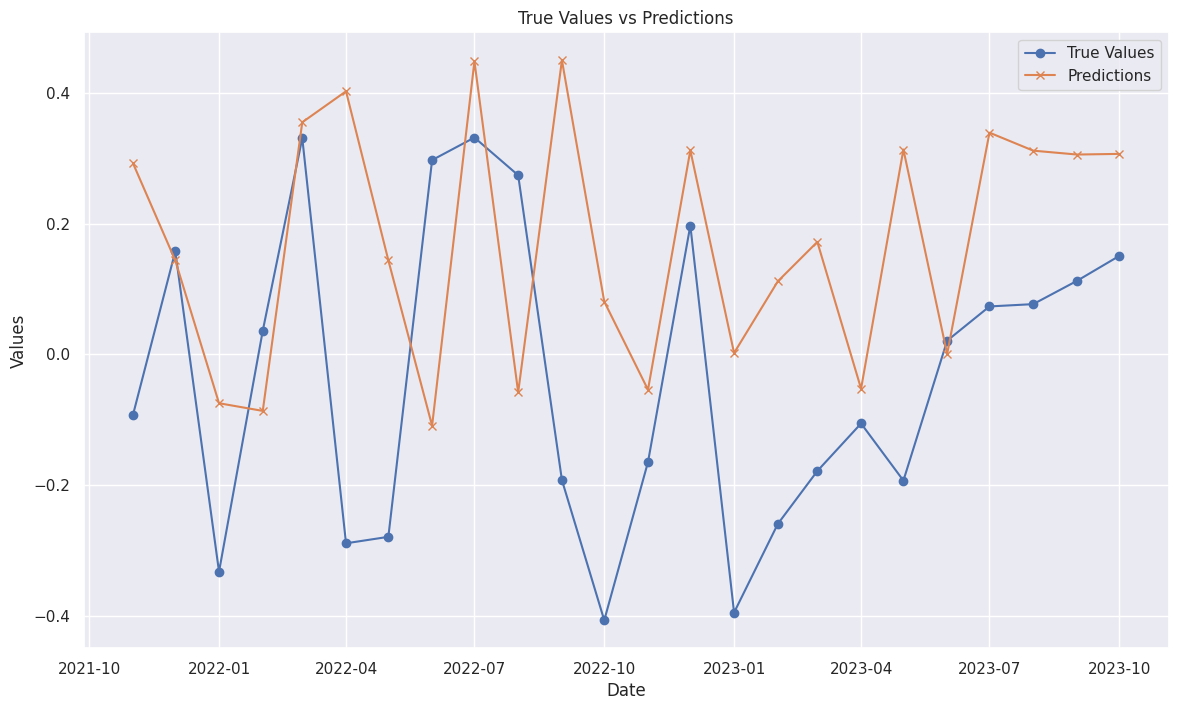

In [9]:
# Inverting the scaling for y_test and predictions
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()


# Plotting the true values and the predictions
plt.figure(figsize=(14, 8))
test_dates = df.index[len(pruned_df) - len(y_test):]
plt.plot(test_dates, y_test, label='True Values', marker='o')
plt.plot(test_dates, predictions, label='Predictions',  marker='x')
plt.title('True Values vs Predictions')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [10]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2784
MAPE: 162.6608 %
MSE: 0.1134
RMSE: 0.3368


## Saving Prediction

In [11]:
df = pd.DataFrame({'ASIALNG M LSTM': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_M_LSTM_forecast.xlsx", index=True)
df

,ASIALNG M LSTM,Actual
0,0.292760,-0.092861
1,0.143835,0.157720
2,-0.074783,-0.332685
3,-0.086537,0.036235
4,0.355318,0.331117
5,0.402789,-0.289232
6,0.143995,-0.279329
7,-0.109169,0.297434
8,0.448632,0.331965
9,-0.058177,0.274233


In [12]:
# Open a file in write mode
with open('ASIALNG M LSTM Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')